In [1]:
import numpy as np
import sys
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_detection/functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_imgs = path + 'imgs/'

In [3]:
LKFs = np.load(path + 'LKFs.npy', allow_pickle=True)[0]

In [4]:
def plot_1(variable, ylabel, ylim):
    
    j = xticks[-1]
    k = xticks[6]

    fig, axs = plt.subplots(1,2, figsize=(11,4), width_ratios=[2,1.05])

    for ax, data, var, title, d in zip(
        axs,
        [LKFs['2010s'][variable], LKFs['2090s'][variable]],
        [LKFs['2010s'][variable+' sd'], LKFs['2090s'][variable+' sd']],
        ['2013 - 2020', '2093 - 2100'],
        [j,k]
    ):
        
        # this rolls december to the beginning
        data = np.roll(data,31)[:d]
        var = np.roll(var,31)[:d]
        
        ax.plot(data)
        ax.fill_between(np.arange(d), data+var, data-var, alpha=0.5)
        ax.set_xlim([0,d])
        ax.set_xticks(xticks[:int(d/30)],[])
        ax.set_xticks(xticks_minor[:int(d/30)],np.roll(xticks_labels,1)[:int(d/30)], rotation=70, minor=True)
        ax.set_ylim([0,ylim])
        ax.set_title(title)
        ax.grid()

    axs[0].set_ylabel(ylabel)
    axs[1].yaxis.set_ticklabels([])
    fig.tight_layout()

In [5]:
def plot_2(variable, ylabel, ylim, xranges=(365,365), ylim_lower=0):
    fig = plt.figure(figsize=(8,3))


    for decade, xrange in zip(['2010s', '2090s'], xranges):

        data = np.roll(LKFs[decade][variable],31)[:xrange]
        var = np.roll(LKFs[decade][variable+' sd'],31)[:xrange]

        plt.plot(np.arange(xrange), data, label=decade)
        plt.fill_between(np.arange(xrange), data+var, data-var, alpha=0.5)

    plt.xlim([0,365])
    plt.xticks(xticks, [])
    plt.xticks(xticks_minor, np.roll(xticks_labels,1), rotation=70, minor=True)
    plt.ylim([ylim_lower,ylim])
    plt.ylabel(ylabel)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid()
    fig.tight_layout()

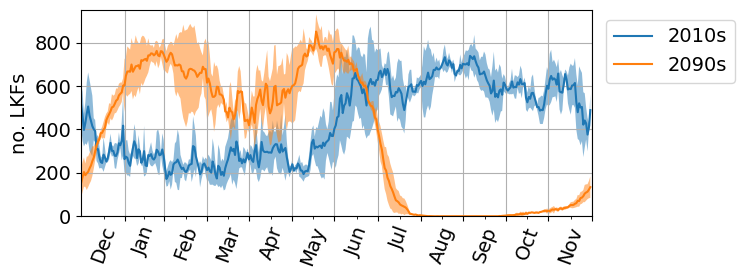

In [6]:
plot_2('number', 'no. LKFs', 950)
plt.savefig(path_imgs + '2no.png', dpi=100, bbox_inches='tight')

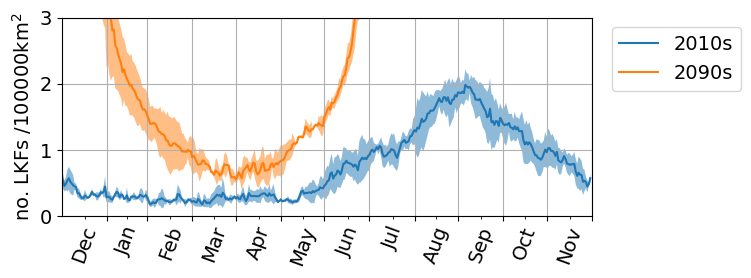

In [7]:
plot_2('density', 'no. LKFs /100000km$^2$', 3, (365, xticks[6]))
plt.savefig(path_imgs + '2rho.png', dpi=100, bbox_inches='tight')

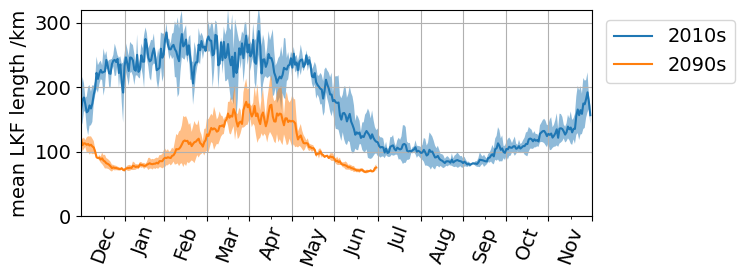

In [8]:
plot_2('mean length', 'mean LKF length /km', 320, (365, xticks[6]))
plt.savefig(path_imgs + '2mean_len.png', dpi=100, bbox_inches='tight')

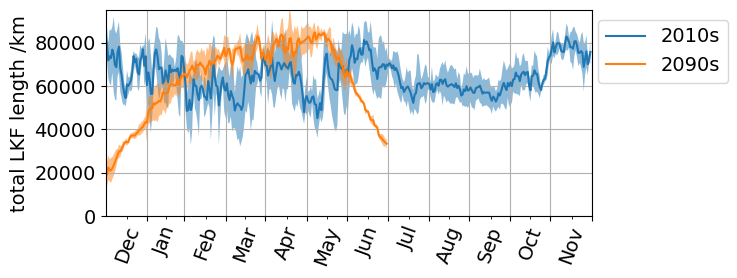

In [9]:
plot_2('total length', 'total LKF length /km', 95000, (365, xticks[6]))
plt.savefig(path_imgs + '2tot_len.png', dpi=100, bbox_inches='tight')

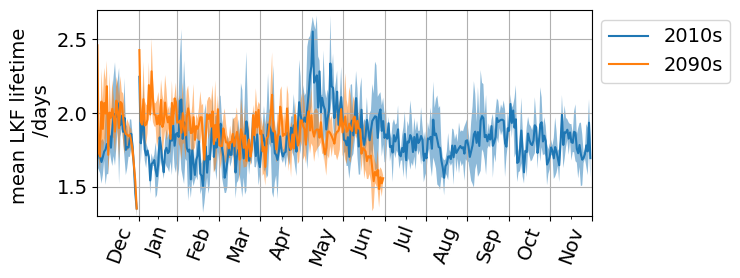

In [10]:
plot_2('mean lifetime', 'mean LKF lifetime \n /days', 2.7, (365, xticks[6]), 1.3)
plt.savefig(path_imgs + '2mean_lt.png', dpi=100, bbox_inches='tight')

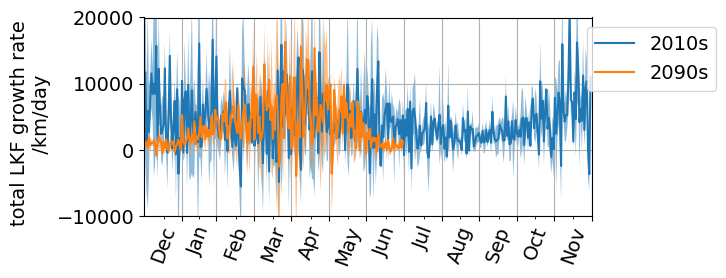

In [11]:
plot_2('total growth rate', 'total LKF growth rate  \n /km/day', 20000, (365, xticks[6]), -10_000)
plt.savefig(path_imgs + '2tot_growth_rate.png', dpi=100, bbox_inches='tight')

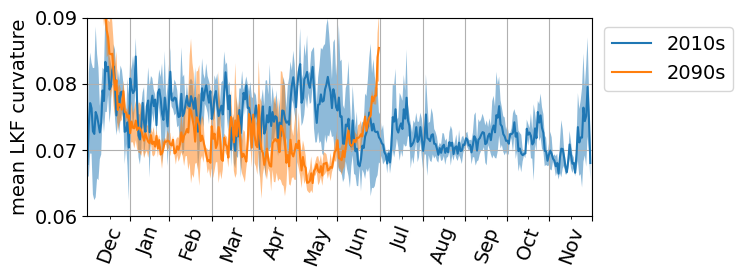

In [12]:
plot_2('curvature', 'mean LKF curvature', 0.09, (365,xticks[6]), 0.06)
plt.savefig(path_imgs + '2mean_curv.png', dpi=100, bbox_inches='tight')

In [13]:
LKFs['y2013']['total'].keys()

Index(['number', 'density', 'mean length', 'total length', 'mean lifetime',
       'total growth rate', 'mean curvature'],
      dtype='object')

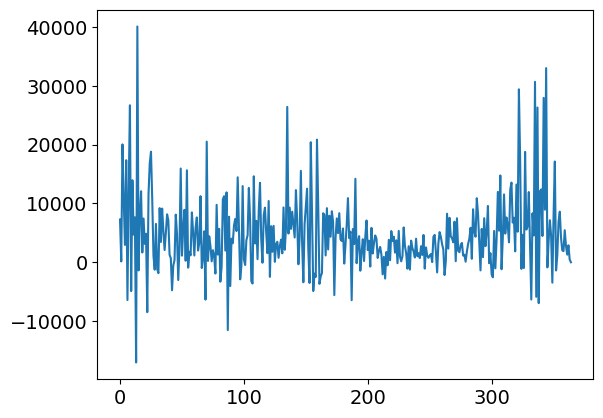

In [14]:
plt.plot(LKFs['y2013']['total']['total growth rate'])